In [ ]:
!pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for classy: filename=classy-3.3.1.0-cp311-cp311-linux_x86_64.whl size=11557884 sha256=15300f6ceb08377f29d9a9a53ee8a3fa57751a7e568f85d191a54f849fd26cbe
  Stored in directory: /root/.cache/pip/wheels/2d/39/fb/425d3b5621929de4e4437260951b8582ea9bf333c5efdd1b67
Successfully built classy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.special import lpn
from scipy.special import lpmn
from classy import Class

# P1.1

In [ ]:
# Set up the input parameters #
Omega_m = 0.3 # matter density parameter
Omega_b = 0.043 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.96 # scalar spectral index
sigma8 = 0.81 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo = Class()
Cosmo.set(commonsettings)
Cosmo.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo.Hubble(0.5)) #function of redshift
print(Cosmo.angular_distance(1.0))
print(Cosmo.pk(1.0, 0.2)) #fn of wavenumber and redshift

0.00030558821767932766
1651.762983151996
561.9030100233164


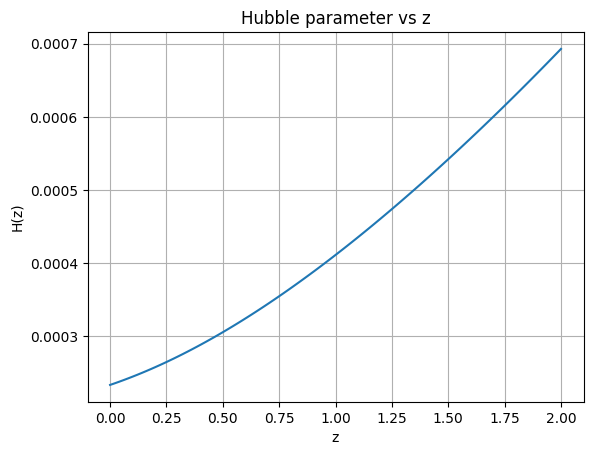

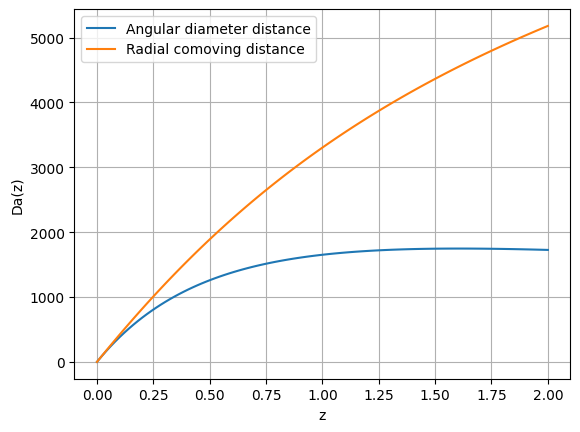

In [ ]:
import matplotlib.pyplot as plt

z= np.linspace(0,2,100)
H_arr=np.array([Cosmo.Hubble(i) for i in z])
Da_arr=np.array([Cosmo.angular_distance(i) for i in z])
chi=np.array([Cosmo.angular_distance(i)*(1+i) for i in z])

plt.plot(z,H_arr)
plt.xlabel('z')
plt.ylabel('H(z)')
plt.grid()
plt.title('Hubble parameter vs z')
plt.show()

plt.plot(z,Da_arr, label='Angular diameter distance')
plt.plot(z,chi, label='Radial comoving distance')
plt.xlabel('z')
plt.ylabel('Da(z)')
plt.grid()
plt.legend()
#plt.title('Angular diameter distance vs z')
plt.show()


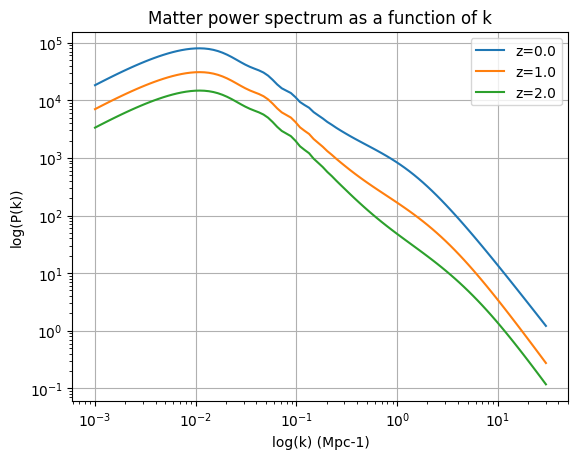

In [ ]:
# Write your code here. Add more coding cells as needed.
# plot matter P(k) vs k for z= 0.0, 1.0, 2.0

k = np.logspace(-3, np.log10(30), 100)  # [1/Mpc]) # 0.001 Mpc-1 to 30 Mpc-1 with 100 bins
Pk_arr0=np.array([Cosmo.pk(i, 0.0) for i in k])
Pk_arr1=np.array([Cosmo.pk(i, 1.0) for i in k])
Pk_arr2=np.array([Cosmo.pk(i, 2.0) for i in k])

plt.loglog(k,Pk_arr0, label='z=0.0')
plt.loglog(k,Pk_arr1, label='z=1.0')
plt.plot(k,Pk_arr2, label='z=2.0')
plt.xlabel('log(k) (Mpc-1)')
plt.ylabel('log(P(k))')
plt.grid()
plt.legend()
plt.title('Matter power spectrum as a function of k')
plt.show()

# P1.2

In [ ]:
# Write your code here. Add more coding cells as needed.
# same process but with Takahashi et al 2017 parameters

# Set up the input parameters #
Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo = Class()
Cosmo.set(commonsettings)
Cosmo.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo.Hubble(0.5)) #function of redshift
print(Cosmo.angular_distance(1.0))
print(Cosmo.pk(1.0, 0.2)) #fn of wavenumber and redshift


0.00030110626218776996
1672.860203880349
584.9576877431342


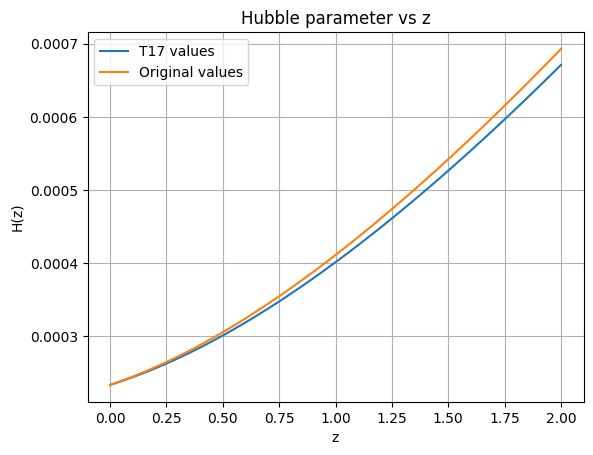

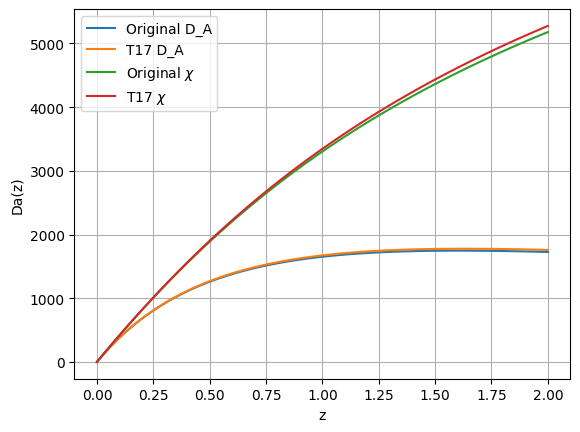

In [ ]:
import matplotlib.pyplot as plt

z= np.linspace(0,2,100)
H_arr2=np.array([Cosmo.Hubble(i) for i in z])
Da_arr2=np.array([Cosmo.angular_distance(i) for i in z])
chi2=np.array([Cosmo.angular_distance(i)*(1+i) for i in z])

plt.plot(z,H_arr2, label='T17 values')
plt.plot(z,H_arr, label='Original values')
plt.xlabel('z')
plt.ylabel('H(z)')
plt.grid()
plt.title('Hubble parameter vs z')
plt.legend()
plt.show()

plt.plot(z, Da_arr, label='Original D_A')
plt.plot(z,Da_arr2, label='T17 D_A')
plt.plot(z, chi, label='Original $\chi$')
plt.plot(z,chi2, label='T17 $\chi$')
plt.xlabel('z')
plt.ylabel('Da(z)')
plt.grid()
plt.legend()
#plt.title('Angular diameter distance vs z')
plt.show()

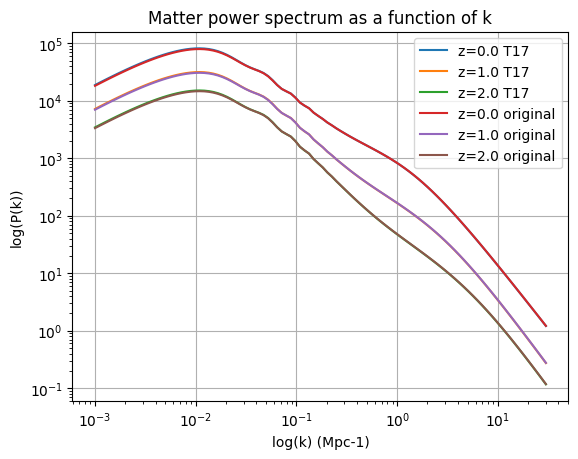

In [ ]:
# Write your code here. Add more coding cells as needed.
# matter P(k) at z=0,1,2 and a sequence of wavenumbers using T17 params
# use same wavenumber values as previous section

# Write your code here. Add more coding cells as needed.
# plot matter P(k) vs k for z= 0.0, 1.0, 2.0

k = np.logspace(-3, np.log10(30), 100)  # [1/Mpc]) # 0.001 Mpc-1 to 30 Mpc-1 with 100 bins
Pk1_arr0=np.array([Cosmo.pk(i, 0.0) for i in k])
Pk1_arr1=np.array([Cosmo.pk(i, 1.0) for i in k])
Pk1_arr2=np.array([Cosmo.pk(i, 2.0) for i in k])

plt.loglog(k,Pk1_arr0, label='z=0.0 T17')
plt.loglog(k,Pk1_arr1, label='z=1.0 T17')
plt.plot(k,Pk1_arr2, label='z=2.0 T17')
plt.loglog(k,Pk_arr0, label='z=0.0 original')
plt.loglog(k,Pk_arr1, label='z=1.0 original')
plt.loglog(k,Pk_arr2, label='z=2.0 original')
plt.xlabel('log(k) (Mpc-1)')
plt.ylabel('log(P(k))')
plt.grid()
plt.legend()
plt.title('Matter power spectrum as a function of k')
plt.show()


In [ ]:
# Write your code here. Add more coding cells as needed.
# same process but with Takahashi et al 2017 parameters

# Set up the input parameters # SWITCH OFF NON LINEAR

Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
#nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
#'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo = Class()
Cosmo.set(commonsettings)
Cosmo.compute()
# several functions on can call from python class object Cosmo #
print(Cosmo.Hubble(0.5)) #function of redshift
print(Cosmo.angular_distance(1.0))
print(Cosmo.pk(1.0, 0.2)) #fn of wavenumber and redshift


0.00030110626218776996
1672.860203880349
67.75566601876017


# P1.Optional

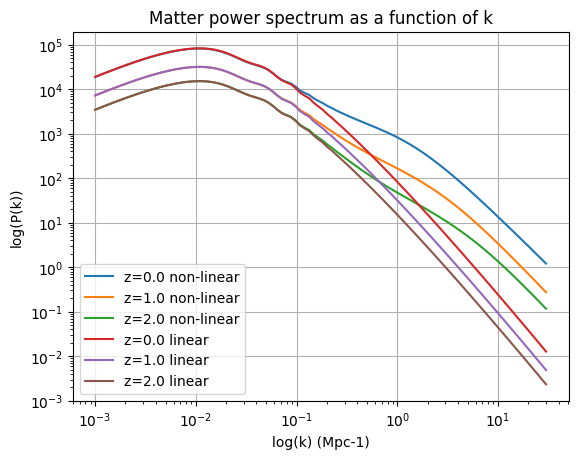

In [ ]:
# Write your code here. Add more coding cells as needed.
# matter P(k) at z=0,1,2 and a sequence of wavenumbers using T17 params
# use same wavenumber values as previous section

# Write your code here. Add more coding cells as needed.
# plot matter P(k) vs k for z= 0.0, 1.0, 2.0

k = np.logspace(-3, np.log10(30), 100)  # [1/Mpc]) # 0.001 Mpc-1 to 30 Mpc-1 with 100 bins
Pk2_arr0=np.array([Cosmo.pk(i, 0.0) for i in k])
Pk2_arr1=np.array([Cosmo.pk(i, 1.0) for i in k])
Pk2_arr2=np.array([Cosmo.pk(i, 2.0) for i in k])

plt.loglog(k,Pk1_arr0, label='z=0.0 non-linear')
plt.loglog(k,Pk1_arr1, label='z=1.0 non-linear')
plt.plot(k,Pk1_arr2, label='z=2.0 non-linear')
plt.loglog(k,Pk2_arr0, label='z=0.0 linear')
plt.loglog(k,Pk2_arr1, label='z=1.0 linear')
plt.loglog(k,Pk2_arr2, label='z=2.0 linear')
plt.xlabel('log(k) (Mpc-1)')
plt.ylabel('log(P(k))')
plt.grid()
plt.legend()
plt.title('Matter power spectrum as a function of k')
plt.show()


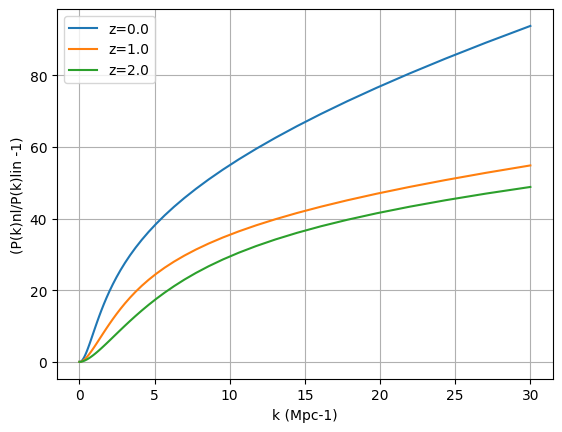

In [ ]:
# plot fractional difference Pnl/Plin-1

diff_z0= Pk1_arr0/Pk2_arr0 -1
diff_z1= Pk1_arr1/Pk2_arr1 -1
diff_z2= Pk1_arr2/Pk2_arr2 -1

plt.plot(k,diff_z0, label='z=0.0')
plt.plot(k,diff_z1, label='z=1.0')
plt.plot(k,diff_z2, label='z=2.0')
plt.xlabel('k (Mpc-1)')
plt.ylabel('(P(k)nl/P(k)lin -1)')
plt.grid()
plt.legend()
plt.show()

# P1.3

#varying omega_b

46660.3642870742
48158.14144602703
45216.44183095869


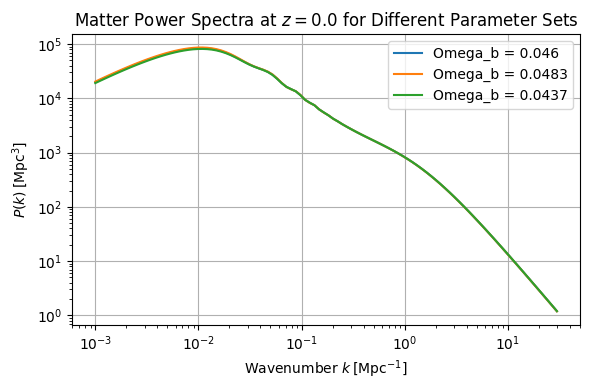

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
Omega_cdm =  0.233
# Input arrays
Omega_b_array = np.array([0.046, 0.0483, 0.0437])
Omega_cdm_array = np.array([0.233, 0.24465, 0.22135])
h_array       = np.array([0.7,   0.735,  0.665])
sigma8_array  = np.array([0.82,  0.861,  0.779])

# Fixed parameters
n_s            = 0.96
nonlinear_model= "Halofit"
kmax_pk        = 50.0
#z_eval         = 0.0  # redshift at which to evaluate P(k)
k              = np.logspace(-3, np.log10(30), 100)  # [1/Mpc]

# Plot
plt.figure(figsize=(6, 4))
for i, (Ob) in enumerate((Omega_b_array)):
    # CLASS settings
    # Write down the input dictionary #
    settings = {
    'N_ur' :3.046,
    'N_ncdm' :0,
    'output' :'mPk',
    'P_k_max_1/Mpc' :kmax_pk,
    'omega_b' :Ob * h**2,
    'h' :h,
    'n_s' :n_s,
    'sigma8' :sigma8,
    'omega_cdm' :(Omega_m - Ob) * h**2,
    'Omega_k' :0.0,
    'Omega_fld' :0.0,
    'Omega_scf' :0.0,
    'YHe' :0.24,
    'z_max_pk' :z_max_pk,
    'non linear' :nonlinear_model,
    'write warnings':'yes' }
    # Compute P(k)
    cosmo = Class()
    cosmo.set(settings)
    cosmo.compute()
    Pk = np.array([cosmo.pk(ki, 0.0) for ki in k])
    #cosmo.struct_cleanup()
    #cosmo.empty()
    # Plot
    plt.loglog(k, Pk, label=f"Omega_b = {Ob}")
    print((Pk[10]))

plt.xlabel(r"Wavenumber $k\:[{\rm Mpc}^{-1}]$")
plt.ylabel(r"$P(k)\:[{\rm Mpc}^3]$")
plt.title(f"Matter Power Spectra at $z={0.0}$ for Different Parameter Sets")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# varying omega_cdm

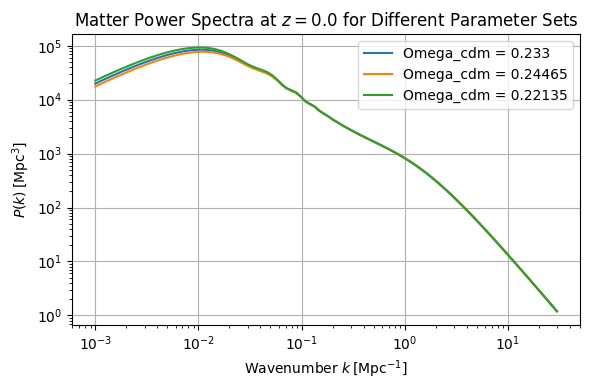

In [ ]:
Omega_cdm =  0.233
# Input arrays
Omega_b_array = np.array([0.046, 0.0483, 0.0437])
Omega_cdm_array = np.array([0.233, 0.24465, 0.22135])
h_array       = np.array([0.7,   0.735,  0.665])
sigma8_array  = np.array([0.82,  0.861,  0.779])

# Fixed parameters
n_s            = 0.96
nonlinear_model= "Halofit"
kmax_pk        = 50.0
#z_eval         = 0.0  # redshift at which to evaluate P(k)
k              = np.logspace(-3, np.log10(30), 100)  # [1/Mpc]

# Plot
plt.figure(figsize=(6, 4))
for i, (O_cdm) in enumerate((Omega_cdm_array)):
    # CLASS settings
    # Write down the input dictionary #
    settings = {
    'N_ur' :3.046,
    'N_ncdm' :0,
    'output' :'mPk',
    'P_k_max_1/Mpc' :kmax_pk,
    'omega_b' :Omega_b * h**2,
    'h' :h,
    'n_s' :n_s,
    'sigma8' :sigma8,
    'omega_cdm' :(O_cdm) * h**2,
    'Omega_k' :0.0,
    'Omega_fld' :0.0,
    'Omega_scf' :0.0,
    'YHe' :0.24,
    'z_max_pk' :z_max_pk,
    'non linear' :nonlinear_model,
    'write warnings':'yes' }
    # Compute P(k)
    cosmo = Class()
    cosmo.set(settings)
    cosmo.compute()
    Pk = np.array([cosmo.pk(ki, 0.0) for ki in k])
    #cosmo.struct_cleanup()
    #cosmo.empty()

    # Plot
    plt.loglog(k, Pk, label=f"Omega_cdm = {O_cdm}")

plt.xlabel(r"Wavenumber $k\:[{\rm Mpc}^{-1}]$")
plt.ylabel(r"$P(k)\:[{\rm Mpc}^3]$")
plt.title(f"Matter Power Spectra at $z={0.0}$ for Different Parameter Sets")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#varying sigma_8

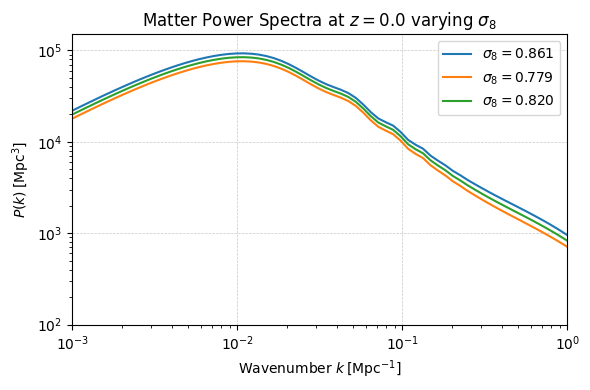

In [ ]:
# Input arrays
Omega_b_array = np.array([0.0483, 0.0437, 0.046])
Omega_m_array = np.array([0.29295, 0.26505, 0.279])
Omega_cdm_array = np.array([Omega_m_array[0] - Omega_b_array[0], Omega_m_array[1] - Omega_b_array[1], 0.233])
h_array       = np.array([0.735,   0.665,  0.7])
sigma8_array  = np.array([0.861,  0.779,  0.82])

# Plot for sigma_8
plt.figure(figsize=(6, 4))
for i, (s_8) in enumerate((sigma8_array)):
    # CLASS settings
    # Write down the input dictionary #
    settings = {
    'N_ur' :3.046,
    'N_ncdm' :0,
    'output' :'mPk',
    'P_k_max_1/Mpc' :kmax_pk,
    'omega_b' :Omega_b * h**2,
    'h' :h,
    'n_s' :n_s,
    'sigma8' :s_8,
    'omega_cdm' :(Omega_cdm) * h**2,
    'Omega_k' :0.0,
    'Omega_fld' :0.0,
    'Omega_scf' :0.0,
    'YHe' :0.24,
    'z_max_pk' :z_max_pk,
    'non linear' :nonlinear_model,
    'write warnings':'yes' }
    # Compute P(k)
    cosmo = Class()
    cosmo.set(settings)
    cosmo.compute()
    Pk = np.array([cosmo.pk(ki, 0.0) for ki in k])
    #cosmo.struct_cleanup()
    #cosmo.empty()

    # Plot
    plt.loglog(k, Pk, label=fr'$\sigma_{8} = {s_8:.3f}$')
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel(r"Wavenumber $k\:[{\rm Mpc}^{-1}]$")
plt.ylabel(r"$P(k)\:[{\rm Mpc}^3]$")
plt.title(f"Matter Power Spectra at $z={0.0}$ varying $\sigma_{8}$")
plt.xlim(0.001, 1)
plt.ylim(100, 150000)
plt.legend()
plt.tight_layout()
plt.show()


#varying h

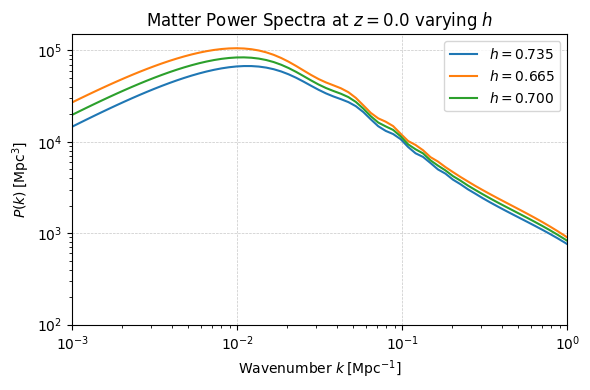

In [ ]:
# Plot for h
plt.figure(figsize=(6, 4))
for i, (h) in enumerate((h_array)):
    # CLASS settings
    # Write down the input dictionary #
    settings = {
    'N_ur' :3.046,
    'N_ncdm' :0,
    'output' :'mPk',
    'P_k_max_1/Mpc' :kmax_pk,
    'omega_b' :Omega_b * h**2,
    'h' :h,
    'n_s' :n_s,
    'sigma8' :sigma8,
    'omega_cdm' :(Omega_cdm) * h**2,
    'Omega_k' :0.0,
    'Omega_fld' :0.0,
    'Omega_scf' :0.0,
    'YHe' :0.24,
    'z_max_pk' :z_max_pk,
    'non linear' :nonlinear_model,
    'write warnings':'yes' }
    # Compute P(k)
    cosmo = Class()
    cosmo.set(settings)
    cosmo.compute()
    Pk = np.array([cosmo.pk(ki, 0.0) for ki in k])
    #cosmo.struct_cleanup()
    #cosmo.empty()

    # Plot
    plt.loglog(k, Pk, label=fr'$h = {h:.3f}$')
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlabel(r"Wavenumber $k\:[{\rm Mpc}^{-1}]$")
plt.ylabel(r"$P(k)\:[{\rm Mpc}^3]$")
plt.title(f"Matter Power Spectra at $z={0.0}$ varying $h$")
plt.xlim(0.001, 1)
plt.ylim(100, 150000)
plt.legend()
plt.tight_layout()
plt.show()


#central difference

In [ ]:
k = np.logspace(-3, np.log10(30), num=1000000)
Omega_m = 0.279               # Matter density parameter
n_s = 0.97                    # Scalar spectral index
z_max_pk = 2.5
kmax_pk = 50.0
nonlinear_model = "Halofit"   # nonlinear modelling recipe

# 0. Class function organization

def Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model):
    settings = {
        'N_ur': 3.046,
        'N_ncdm': 0,
        'output': 'mPk',
        'P_k_max_1/Mpc': kmax_pk,
        'omega_b': Omega_b * h**2,
        'h': h,
        'n_s': n_s,
        'sigma8': sigma8,
        'omega_cdm': (Omega_m - Omega_b) * h**2,
        'Omega_k': 0.0,
        'Omega_fld': 0.0,
        'Omega_scf': 0.0,
        'YHe': 0.24,
        'z_max_pk': z_max_pk,
        'non linear': nonlinear_model,
        'write warnings': 'yes'
    }
    cosmo = Class()
    cosmo.set(settings)
    cosmo.compute()
    return cosmo

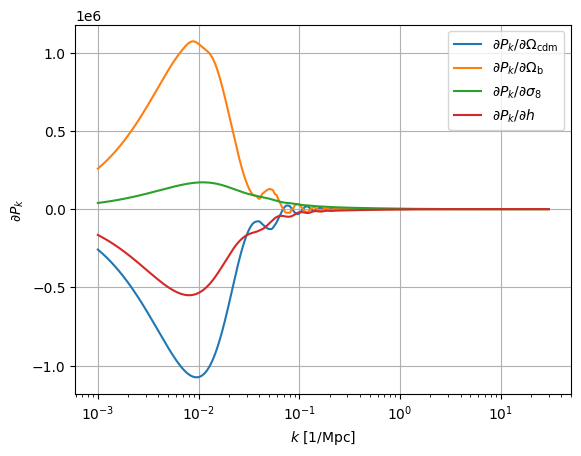

In [ ]:
# 1. CDM + 0.1%

delta_cdm = 0.000233

Omega_b = 0.045767   # Baryon density
h = 0.7              # Hubble parameter / 100
sigma8 = 0.82        # Power spectrum amplitude

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkc_01_up = np.array([power_spectrum.pk(ki, 0) for ki in k])

# 2. CDM - 0.1%

Omega_b = 0.046233
h = 0.7
sigma8 = 0.82

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkc_01_down = np.array([power_spectrum.pk(ki, 0) for ki in k])

CDM = (Pkc_01_up - Pkc_01_down)/(2*delta_cdm)

# 3. Baryon + 0.1%

delta_baryon = 0.046*0.001

Omega_b = 0.046 + delta_baryon
h = 0.7
sigma8 = 0.82

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkb_01_up = np.array([power_spectrum.pk(ki, 0) for ki in k])

# 4. Baryon - 0.1%

Omega_b = 0.046 - delta_baryon
h = 0.7
sigma8 = 0.82

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkb_01_down = np.array([power_spectrum.pk(ki, 0) for ki in k])

BARYON = (Pkb_01_up - Pkb_01_down)/(2*delta_baryon)

# 5. sigma8 + 0.1%

delta_sigma = 0.82*0.001

Omega_b = 0.03435
h = 0.7
sigma8 = 0.82 + delta_sigma

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pks_01_up = np.array([power_spectrum.pk(ki, 0) for ki in k])

# 6. sigma8 - 0.1%

Omega_b = 0.03435
h = 0.7
sigma8 = 0.82 - delta_sigma

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pks_01_down = np.array([power_spectrum.pk(ki, 0) for ki in k])

SIGMA = (Pks_01_up - Pks_01_down)/(2*delta_sigma)

# 7. hubble + 0.1%

delta_hubble = 0.7*0.001

Omega_b = 0.046
h = 0.7 + delta_hubble
sigma8 = 0.82

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkh_01_up = np.array([power_spectrum.pk(ki, 0) for ki in k])

# 8. hubble - 0.1%

Omega_b = 0.046
h = 0.7 - delta_hubble
sigma8 = 0.82

power_spectrum = Pk_function(kmax_pk, Omega_b, h, n_s, sigma8, Omega_m, z_max_pk, nonlinear_model)
Pkh_01_down = np.array([power_spectrum.pk(ki, 0) for ki in k])

HUBBLE = (Pkh_01_up - Pkh_01_down)/(2*delta_hubble)

plt.semilogx(k, CDM, label=r'$\partial P_k / \partial \Omega_{\mathrm{cdm}}$')
plt.semilogx(k, BARYON, label=r'$\partial P_k / \partial \Omega_{\mathrm{b}}$')
plt.semilogx(k, SIGMA, label=r'$\partial P_k / \partial \sigma_8$')
plt.semilogx(k, HUBBLE, label=r'$\partial P_k / \partial h$')
plt.xlabel(r'$k\ \mathrm{[1/Mpc]}$')
plt.ylabel(r'$\partial P_k$')
plt.legend()
plt.grid(True)
plt.show()

# P1.4

In [ ]:
# Write your code here. Add more coding cells as needed.
# lensing kernel q(chi(z))=3H0^2*Omega_m/(2c^2)*((chi_s-chi)/chi_s)*(chi/a(chi))

c= 299792.458 #km/s
H0=70 #km/s/Mpc

zs1=0.5739
zs2=1.0344

z01=np.linspace(0,zs1,100)
z02=np.linspace(0,zs2,100)

def chi(z):
  return Cosmo.angular_distance(z)*(1+z)

def a(z):
  return 1/(1+z)

def q(zs,z):
  z = np.asarray(z)
  term1=1.5*H0**2*Omega_m/(c**2)
  term2=(chi(zs)-chi(z))/chi(zs)
  term3=chi(z)/a(z)
  term4=term1*term2*term3
  return term4


print(q(zs1,z01))
print(q(zs2,z02))



[0.00000000e+00 5.62472241e-07 1.11684991e-06 1.66297425e-06
 2.20068903e-06 2.72984051e-06 3.25027747e-06 3.76185119e-06
 4.26441542e-06 4.75782640e-06 5.24194283e-06 5.71662587e-06
 6.18173913e-06 6.63714865e-06 7.08272289e-06 7.51833273e-06
 7.94385142e-06 8.35915462e-06 8.76412036e-06 9.15862899e-06
 9.54256325e-06 9.91580816e-06 1.02782511e-05 1.06297816e-05
 1.09702917e-05 1.12996755e-05 1.16178295e-05 1.19246522e-05
 1.22200445e-05 1.25039095e-05 1.27761523e-05 1.30366804e-05
 1.32854031e-05 1.35222321e-05 1.37470811e-05 1.39598658e-05
 1.41605040e-05 1.43489157e-05 1.45250226e-05 1.46887486e-05
 1.48400196e-05 1.49787632e-05 1.51049094e-05 1.52183895e-05
 1.53191372e-05 1.54070878e-05 1.54821786e-05 1.55443485e-05
 1.55935384e-05 1.56296910e-05 1.56527506e-05 1.56626633e-05
 1.56593770e-05 1.56428412e-05 1.56130071e-05 1.55698275e-05
 1.55132570e-05 1.54432515e-05 1.53597688e-05 1.52627681e-05
 1.51522102e-05 1.50280574e-05 1.48902734e-05 1.47388236e-05
 1.45736746e-05 1.439479

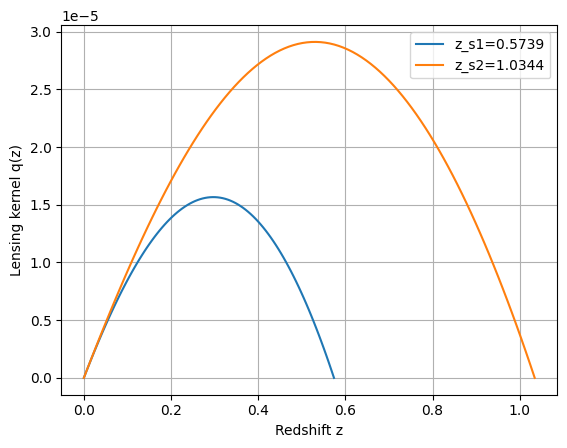

In [ ]:
plt.plot(z01,q(zs1,z01), label='z_s1=0.5739')
plt.plot(z02,q(zs2,z02), label='z_s2=1.0344')
plt.xlabel('Redshift z')
plt.ylabel('Lensing kernel q(z)')
plt.grid()
plt.legend()
plt.show()

# P1.5

In [ ]:
c = 299792.458  # speed of light in km/s

# Precompute H0

# Set up the input parameters #
Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 2500#50.0 #3000°
z_max_pk = 2.5

Omega_L = 0.721 # Dark energy density parameter
zs   = [0.5739, 1.0344]      # two Dirac‐delta source redshifts

# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo_P5 = Class()
Cosmo_P5.set(commonsettings)
Cosmo_P5.compute()
H0_P5  = Cosmo_P5.Hubble(0)     # in km/s/Mpc

In [ ]:
# Write down the input dictionary #
cosmo = Class()
Cosmo.set( {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' })
# Set up the CLASS object and compute it #

Cosmo_P5.compute()
# check binding
print("Unbound:", Class.get_current_derived_parameters)
print("  Bound:", cosmo.get_current_derived_parameters)

Unbound: <cyfunction Class.get_current_derived_parameters at 0x7c0d62a7b040>
  Bound: <bound method Class.get_current_derived_parameters of <classy.Class object at 0x1ff687b0>>


In [ ]:
zs   = [0.5739, 1.0344]

def chi_of_z(z):
    return Cosmo_P5.angular_distance(z) * (1.0 + z)

def compute_Cl(ell, z_s, nz):
    redshift = np.linspace(1e-4, z_s, nz)
    # get chi(z) and H(z) safely:
    chi = chi_of_z(redshift)
    chi_s = chi_of_z(z_s)
    Hz  = Cosmo_P5.Hubble(redshift)
    dchi_dz = c/Hz

    # kernel W(z) = (χ_s - χ)/χ_s * (1+z)
    W = ((chi_s - chi)/chi_s) * (1 + redshift)

    # Fourier mode
    k = ell/chi

    # matter power
    #P = np.array([Cosmo_P5.pk(ki, zi) for ki, zi in zip(k,z)])
    P_list = []
    for z in redshift:
        chi= chi_of_z(z)
        k = ell / chi if chi != 0 else np.inf
        P = Cosmo_P5.pk(k, z) if np.isfinite(k) else 0
        P_list.append(P)
    # **correct** integrand
    power_spec_arr = np.array(P_list)
    H0 = Cosmo_P5.Hubble(0) * c #!! km/sMPC

    prefac = 9/4 * H0**4 * Omega_m**2 / c**3
    H = np.array(Cosmo_P5.Hubble(redshift)) * c
    second_term = np.array(W)
    Integrand = second_term**2 / H * power_spec_arr #P_list

    Integral = np.trapezoid(Integrand, redshift)
    return prefac * Integral
ell = 1000 #^-13
Cl_val_z1_l1000 = compute_Cl(ell, zs[0], nz=100)
Cl_val_z2_l1000 = compute_Cl(ell, zs[1], nz=100)
print(f"C_{ell} for z_s={zs[0]}: {Cl_val_z1_l1000:.3e}")
print(f"C_{ell} for z_s={zs[1]}: {Cl_val_z2_l1000:.3e}")

C_1000 for z_s=0.5739: 1.442e-10
C_1000 for z_s=1.0344: 4.043e-10


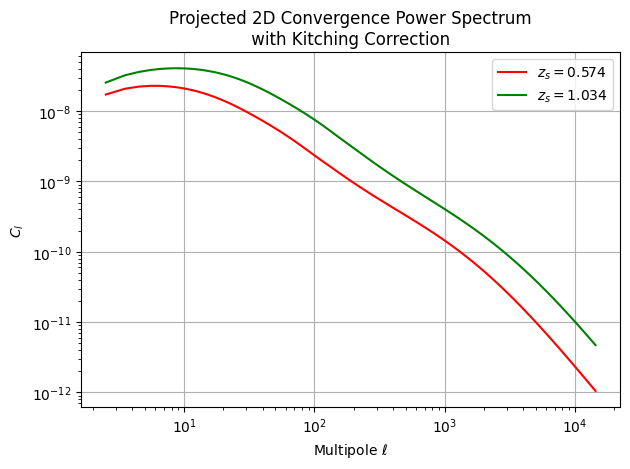

In [ ]:
# with kitching correction

z_s1 = 0.5739
z_s2 = 1.0344

def chi_of_z(z):
    return Cosmo_P5.angular_distance(z) * (1.0 + z)

def compute_Cl(ell, z_s, nz):
    redshift = np.linspace(0, z_s, nz) # Added small value to lower bound
    # get chi(z) and H(z) safely:
    chi = chi_of_z(redshift)
    chi_s = chi_of_z(z_s)
    Hz  = Cosmo_P5.Hubble(redshift)
    dchi_dz = c/Hz

    # kernel W(z)
    W = ((chi_s - chi)/chi_s) * (1 + redshift)

    P_list = [
    (Cosmo_P5.pk(k, z) if np.isfinite(k) else 0.0)
    for z in redshift
    for k in [ (ell / chi_of_z(z)) if chi_of_z(z) != 0 else np.inf ]]

    P_arr = np.array(P_list)
    H0 = Cosmo_P5.Hubble(0) * c #!! km/sMPC

    fac = 9/4 * H0**4 * Omega_m**2 / c**3
    H = np.array(Cosmo_P5.Hubble(redshift)) * c
    Integrand = W**2 / H * P_arr

    Integral = np.trapezoid(Integrand, redshift)
    return fac * Integral


# Create logarithmic multipole array from ell = 2 to ell = 15000 with 100 bins

n_bins = 100
log_edges = np.logspace(np.log10(2), np.log10(15000), num=101)
l_edges   = np.floor(log_edges).astype(int)

#enforce strictly increasing + final edge = 15000
for i in range(1, len(l_edges)):
    if l_edges[i] <= l_edges[i-1]:
        l_edges[i] = l_edges[i-1] + 1
l_edges[-1] = 15000
l_centers = (l_edges[:-1] + l_edges[1:]) / 2

# computing the projection for the array that was created above
proj_source_1 =[compute_Cl(l+ 0.5, z_s1, 100)for l in l_centers]
proj_source_2 = [compute_Cl(l+0.5, z_s2, 100)for l in l_centers]
# Apply Kitching correction: multiply by ell(ell+1)/(2π)
C_l_corrected_z1=np.zeros(100)
C_l_corrected_z2=np.zeros(100)
for i, l in enumerate (l_centers):
 kitching_factor = (l+2)*(l+1)*l*(l-1)/(l+0.5)**4 #ell_centers * (ell_centers + 1) / (2 * np.pi)
 C_l_corrected_z1[i] = compute_Cl(l+ 0.5, z_s1, 100) * kitching_factor
 C_l_corrected_z2[i] = compute_Cl(l+ 0.5, z_s2, 100) * kitching_factor

plt.loglog(l_centers, C_l_corrected_z1, '-',
           label=f'$z_s = {z_s1:.3f}$', color='red' )
plt.loglog(l_centers, C_l_corrected_z2, '-',
           label=f'$z_s = {z_s2:.3f}$', color='green')

plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_l$')
plt.title('Projected 2D Convergence Power Spectrum\n with Kitching Correction ')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
#plot Cl vs

### Part of P1.6: Notes about the Kitching correction and interpolation

After all the previous exercises, we already have the projected convergence power spectrum at a discrete set of multipole numbers. Now we first have to interpolate the spectrum to a continuous set of integer numbers from 2 to 15000 so that the integrations in Eq.(57) and (58) can be computed using a summation. Then we have to apply the Kitching correction to convert the 2D flat spectrum to an angular spectrum  

# trial 1

In [ ]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

Pk2D_z1 = proj_source_1 # read in previously computed 2D spectrum
Pk2D_z2 =proj_source_2  # read in previously computed 2D spectrum
l_centers = l_centers
l1 = np.linspace(0, 15000, 15001)
l2 = np.linspace(2.5, 15000.5, 14999)
# initialize angular power spectrum array
C_ell_z1 = np.zeros(len(l1))
C_ell_z2 = np.zeros(len(l2))
C_ell_z1[0] = 0  # monopole vanishes
C_ell_z1[1] = 0  # dipole vanishes
C_ell_z2[0] = 0
C_ell_z2[1] = 0

# Interpolate log-log of Pk2D to get values at arbitrary ell
logl_centers = np.log10(l_centers)
logPk2D_z1 = np.log10(Pk2D_z1)
valid_mask_z1 = np.isfinite(logl_centers) & np.isfinite(logPk2D_z1)
logl_clean_z1 = logl_centers[valid_mask_z1]
logPk2D_clean_z1 = logPk2D_z1[valid_mask_z1]

logPk2D_z2 = np.log10(Pk2D_z2)
valid_mask_z2 = np.isfinite(logl_centers) & np.isfinite(logPk2D_z2)
logl_clean_z2 = logl_centers[valid_mask_z2]
logPk2D_clean_z2 = logPk2D_z2[valid_mask_z2]

# Interpolate the computed power spectra onto the fine grid
interp_z1 = interpolate.interp1d(logl_clean_z1, logPk2D_clean_z1, kind='linear', fill_value='extrapolate')
interp_z2 = interpolate.interp1d(logl_clean_z2, logPk2D_clean_z2, kind='linear', fill_value='extrapolate')

# Compute the raw interpolated spectrum at l2
Pk2D_interp_z1 = np.power(10.0, interp_z1(np.log10(l1)))  # now P_2D(l2)
Pk2D_interp_z2 = np.power(10.0, interp_z2(np.log10(l2)))  # now P_2D(l2)

# Apply Kitching correction z1
for j in range(len(l1)):
    ell = int(l1[j])  # integer index into l1
    if ell < len(l1):  # make sure we're in bounds
        numerator = (ell + 2) * (ell + 1) * ell * (ell - 1)
        denominator = (ell + 0.5) ** 4
        correction_factor = numerator / denominator
        C_ell_z1[ell] = correction_factor * Pk2D_interp_z1[j]

# Apply Kitching correction z2
for j in range(len(l2)):
    ell = int(l2[j])  # integer index into l1
    if ell < len(l2):  # make sure we're in bounds
        numerator = (ell + 2) * (ell + 1) * ell * (ell - 1)
        denominator = (ell + 0.5) ** 4
        correction_factor = numerator / denominator
        C_ell_z2[ell] = correction_factor * Pk2D_interp_z2[j]


/tmp/ipython-input-17-66513344.py:35: RuntimeWarning: divide by zero encountered in log10
  Pk2D_interp_z1 = np.power(10.0, interp_z1(np.log10(l1)))  # now P_2D(l2)


# P1.6

### Part of P1.6: Notes about the Hankel transform

The below two functions will compute the Hankel Transform of the 2D angular power spectrum and convert it to plus and minus shear 2PCFs respectively.

In the function argument, theta_min and theta_max are the angular bin edges imported above. Here we will compute the average value of 2PCFs within each angular bin. ell is the multipole number array on which you compute the angular power spectrum and C_ell is the angular power spectrum

In [ ]:
# Here you have to import three arrays of angular separations from the directory 2PCF_angular_separations
#1. The nominal center of each angular separation interval from 5 to 140 arcmin
theta_nominal = np.loadtxt('angularsep_arcmins_20bins.txt')
#2. The right edge of each angular bin
theta_min = np.loadtxt('angularsep_arcmins_min_20bins.txt')
#3. The left edge of each angular bin
theta_max = np.loadtxt('angularsep_arcmins_max_20bins.txt')

In [ ]:
def xip_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_p = G_l_2_+(x) + G_l_2_-(x) i.e. LHS of Friedrich++ for the 'p'lus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1]
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2]

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1]
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2]

    G_l_2_x_p_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            +2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            -2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_p_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

In [ ]:
def xim_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_m = G_l_2_+(x) - G_l_2_-(x) i.e. LHS of Friedrich++ for the 'm'inus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1]
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2]

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1]
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2]

    G_l_2_x_m_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            -2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            +2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_m_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

/tmp/ipython-input-12-1812949357.py:16: DeprecationWarning: `scipy.special.lpn` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.legendre_p_all` instead.
  P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
/tmp/ipython-input-12-1812949357.py:23: DeprecationWarning: `scipy.special.lpn` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.legendre_p_all` instead.
  P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max


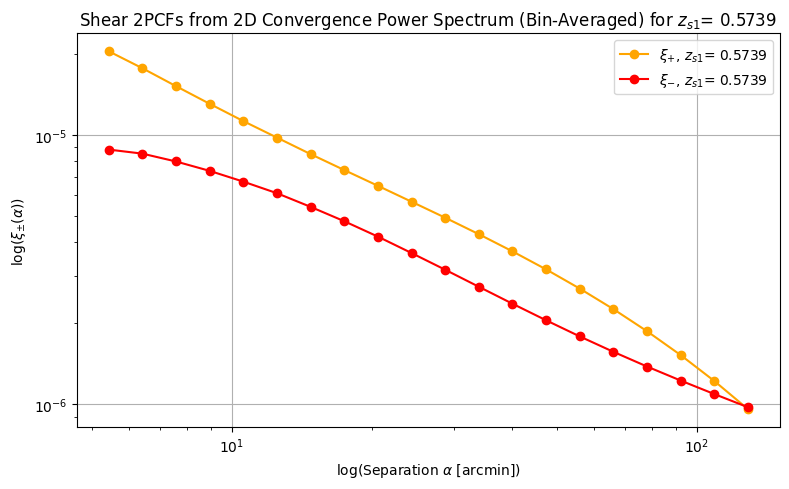

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results saved to shear_2pcf_results.txt and shear_2pcf_results.dat


In [ ]:
# for zs_1

l_val  = l1.astype(int)
Cl_val = C_ell_z1
Cl_valz2 = C_ell_z2

nbins = len(theta_nominal)

sep_arcmin=np.logspace(np.log10(5), np.log10(140), nbins+1)

theta_min_rad = np.radians(theta_min/60)
theta_max_rad = np.radians(theta_max/60)

xip_bin = np.empty(nbins)
xim_bin = np.empty(nbins)

for i in range(nbins):
  thetamin = theta_min_rad[i]
  thetamax = theta_max_rad[i]
  xip_bin[i] = xip_theta_bin_averaged(thetamin, thetamax, l_val, Cl_val)
  xim_bin[i] = xim_theta_bin_averaged(thetamin, thetamax, l_val, Cl_val)


plt.figure(figsize=(8,5))
plt.loglog(theta_nominal, xip_bin, label=r'$\xi_{+}$, $z_{s1}$= 0.5739', marker='o', color='orange')
plt.loglog(theta_nominal, xim_bin, label=r'$\xi_{-}$, $z_{s1}$= 0.5739', marker='o', color='red')
plt.xlabel(r'log(Separation $\alpha$ [arcmin])')
plt.ylabel(r'log($\xi_{\pm}(\alpha)$)')
plt.title('Shear 2PCFs from 2D Convergence Power Spectrum (Bin-Averaged) for $z_{s1}$= 0.5739')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

from google.colab import files

data_to_save = np.column_stack([theta_nominal, xip_bin, xim_bin])
header = "sep_arcmin xi_plus xi_minus"

np.savetxt('shear_2pcf_results_z1.txt', data_to_save, header=header,fmt='%.6e', delimiter='\t')
files.download("shear_2pcf_results_z1.txt")

print("Results saved to shear_2pcf_results.txt and shear_2pcf_results.dat")

/tmp/ipython-input-12-1812949357.py:16: DeprecationWarning: `scipy.special.lpn` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.legendre_p_all` instead.
  P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
/tmp/ipython-input-12-1812949357.py:23: DeprecationWarning: `scipy.special.lpn` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.legendre_p_all` instead.
  P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max


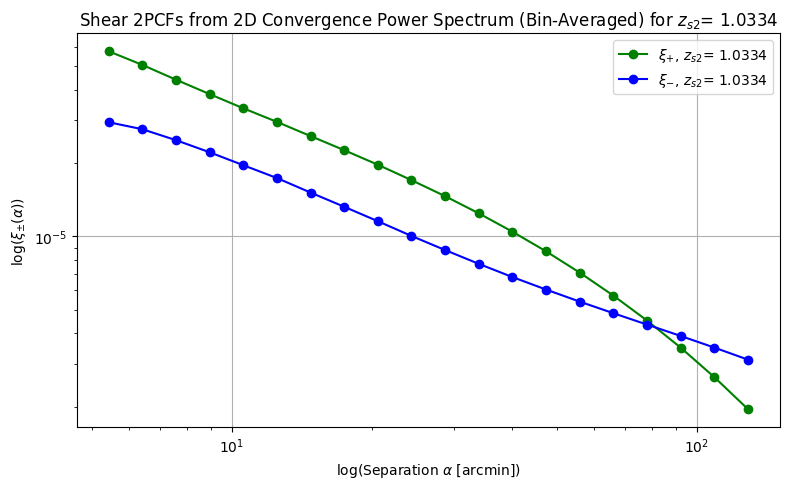

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results saved to shear_2pcf_results.txt and shear_2pcf_results.dat


In [ ]:
# for zs_2

l_val  = l1.astype(int)
Cl_val = C_ell_z1
Cl_valz2 = C_ell_z2

nbins = len(theta_nominal)

theta_min_rad = np.radians(theta_min/60)
theta_max_rad = np.radians(theta_max/60)

xim_z2 = np.empty(nbins)
xip_z2 = np.empty(nbins)

for i in range(nbins):
  thetamin = theta_min_rad[i]
  thetamax = theta_max_rad[i]
  xip_z2[i] = xip_theta_bin_averaged(thetamin, thetamax, l_val, Cl_valz2)
  xim_z2[i] = xim_theta_bin_averaged(thetamin, thetamax, l_val, Cl_valz2)

plt.figure(figsize=(8,5))
plt.loglog(theta_nominal, xip_z2, label=r'$\xi_{+}$, $z_{s2}$= 1.0334', marker='o', color='green')
plt.loglog(theta_nominal, xim_z2, label=r'$\xi_{-}$, $z_{s2}$= 1.0334', marker='o', color='blue')
plt.xlabel(r'log(Separation $\alpha$ [arcmin])')
plt.ylabel(r'log($\xi_{\pm}(\alpha)$)')
plt.title('Shear 2PCFs from 2D Convergence Power Spectrum (Bin-Averaged) for $z_{s2}$= 1.0334')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

data_to_save = np.column_stack([theta_nominal, xip_z2, xim_z2])
header = "sep_arcmin xi_plus xi_minus"

np.savetxt('shear_2pcf_results_z2.txt', data_to_save, header=header,fmt='%.6e', delimiter='\t')
files.download("shear_2pcf_results_z2.txt")

print("Results saved to shear_2pcf_results.txt and shear_2pcf_results.dat")

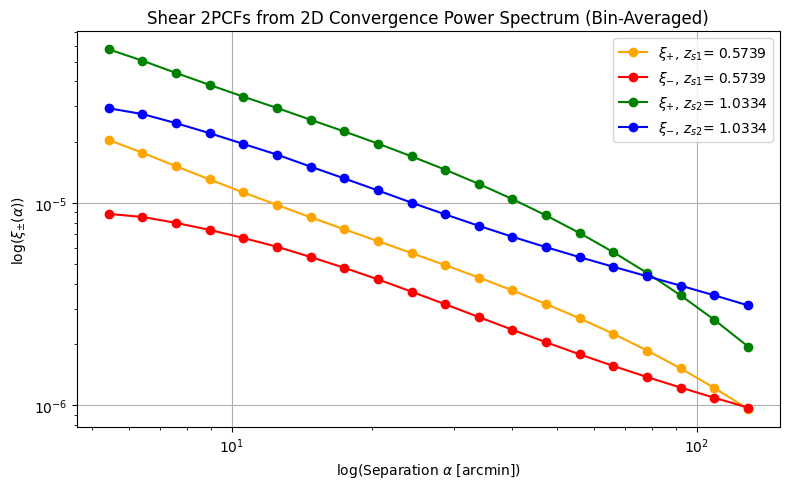

In [ ]:
plt.figure(figsize=(8,5))
plt.loglog(theta_nominal, xip_bin, label=r'$\xi_{+}$, $z_{s1}$= 0.5739', marker='o', color='orange')
plt.loglog(theta_nominal, xim_bin, label=r'$\xi_{-}$, $z_{s1}$= 0.5739', marker='o', color='red')
plt.loglog(theta_nominal, xip_z2, label=r'$\xi_{+}$, $z_{s2}$= 1.0334', marker='o', color='green')
plt.loglog(theta_nominal, xim_z2, label=r'$\xi_{-}$, $z_{s2}$= 1.0334', marker='o', color='blue')
plt.xlabel(r'log(Separation $\alpha$ [arcmin])')
plt.ylabel(r'log($\xi_{\pm}(\alpha)$)')
plt.title('Shear 2PCFs from 2D Convergence Power Spectrum (Bin-Averaged)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()